In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import logging

import numpy as np
import seaborn as sns

Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0)
sim.generate()


/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Run differential expression test:

In [3]:
logging.getLogger("tensorflow").setLevel(logging.WARNING)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy.api as de

test = de.test.lrt(
    data=sim.X,
    full_formula="~ 1 + condition",
    reduced_formula="~ 1",
    sample_description=sim.sample_description
)

lrt is not ready for usage yet!
Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:883: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:908: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, u

training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready
Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:883: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:908: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, u

training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready


In [4]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,grad,grad_red
0,0,0.000000,0.000000,0.093971,7406.505859,8.874265,8.991479
1,1,0.000000,0.000000,-0.933142,5222.650879,8.874265,8.991479
2,2,0.000000,0.000000,0.336240,5811.915039,8.874265,8.991479
3,3,0.000000,0.000000,0.310687,2970.297607,8.874265,8.991479
4,4,0.000000,0.000000,0.652417,6130.775879,8.874265,8.991479
5,5,0.000000,0.000000,-0.465032,9.290500,8.874265,8.991479
6,6,0.000006,0.000006,0.022604,9779.446289,8.874265,8.991479
7,7,0.000000,0.000000,0.807447,1153.740967,8.874265,8.991479
8,8,0.000000,0.000000,0.588648,5952.648926,8.874265,8.991479
9,9,0.000000,0.000000,-0.715448,3416.332520,8.874265,8.991479


`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2d627c50>)

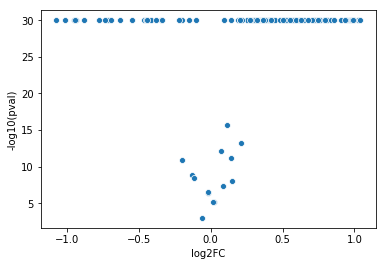

In [5]:
test.plot_volcano()

Show t-test results for comparison:

In [19]:
test_tt = de.test.t_test(
    data=sim.X, 
    grouping="condition", 
    gene_names=np.asarray(sim.X.features),
    sample_description=sim.sample_description
)

/Users/david.fischer/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


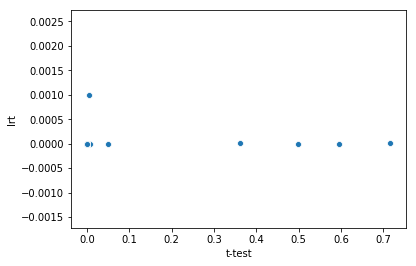

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(x=test_tt.pval, y=test.pval, ax=ax)
ax.set(xlabel="t-test", ylabel='lrt')
fig.show()

Show wald test results for comparison:

In [25]:
test_wald = de.test.wald(
    data=sim.X, 
    formula="~1+condition",
    factor_loc_totest="condition", 
    gene_names=np.asarray(sim.X.features),
    sample_description=sim.sample_description
)

Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:883: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:908: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, u

training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


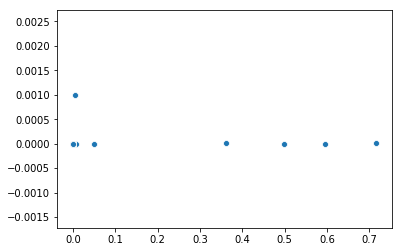

In [37]:
sns.scatterplot(x=test_tt.pval, y=test.pval)
fig.show()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

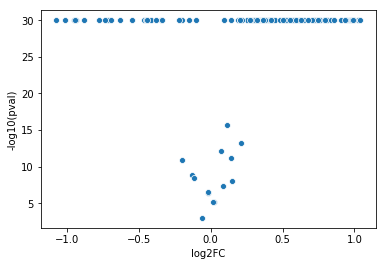

In [7]:
test.plot_diagnostics()